In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
%matplotlib inline
import os
import matplotlib.pyplot as plt

In [3]:
os.getcwd()

'/Users/akitavtewari'

In [7]:
os.chdir('/Users/akitavtewari/Documents/Great Lakes/Week 2')

In [8]:
df = pd.read_csv('Education+-+Post+12th+Standard.csv')
df.head(10)

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Albright College,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Alderson-Broaddus College,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [5]:
df.tail(10)

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
767,Winthrop University,2320,1805,769,24,61,3395,670,6400,3392,580,2150,71,80,12.8,26,6729,59
768,Wisconsin Lutheran College,152,128,75,17,41,282,22,9100,3700,500,1400,48,48,8.5,26,8960,50
769,Wittenberg University,1979,1739,575,42,68,1980,144,15948,4404,400,800,82,95,12.8,29,10414,78
770,Wofford College,1501,935,273,51,83,1059,34,12680,4150,605,1440,91,92,15.3,42,7875,75
771,Worcester Polytechnic Institute,2768,2314,682,49,86,2802,86,15884,5370,530,730,92,94,15.2,34,10774,82
772,Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99
776,York College of Pennsylvania,2989,1855,691,28,63,2988,1726,4990,3560,500,1250,75,75,18.1,28,4509,99


In [10]:
df.shape

(777, 18)

In [13]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [14]:
df.dtypes

Names           object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [15]:
df.isna().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [17]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


In [ ]:
# The Univariate analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a46aa1c90>,
      dtype=object)

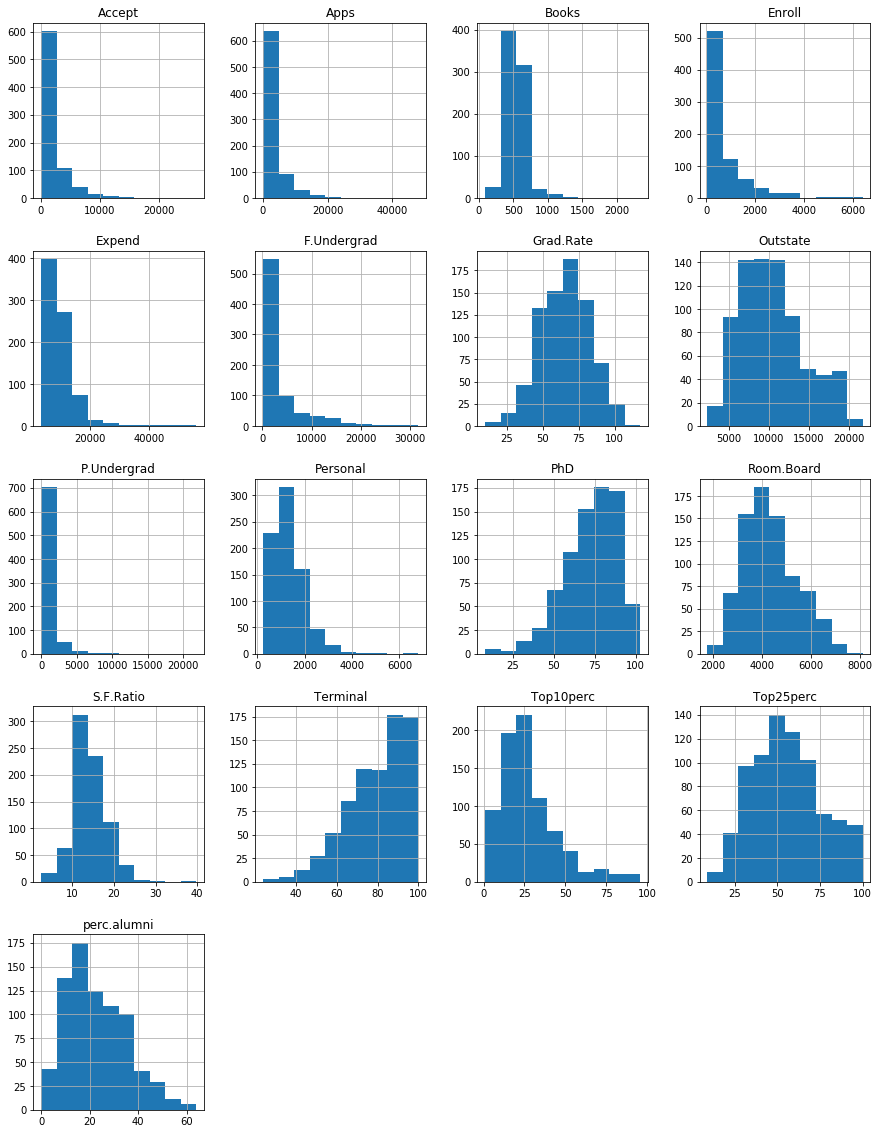

In [19]:
df.hist(figsize=(15,20))

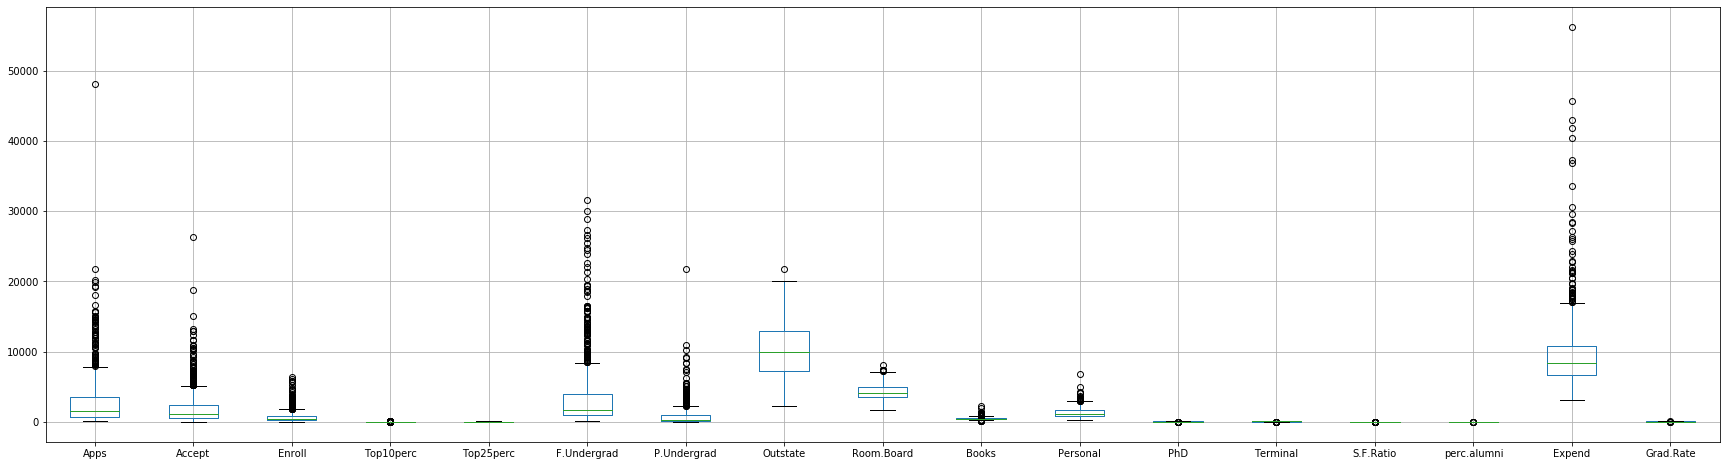

In [25]:
df.boxplot(figsize=(30,8))

In [26]:
print(df.skew())

Apps           3.723750
Accept         3.417727
Enroll         2.690465
Top10perc      1.413217
Top25perc      0.259340
F.Undergrad    2.610458
P.Undergrad    5.692353
Outstate       0.509278
Room.Board     0.477356
Books          3.485025
Personal       1.742497
PhD           -0.768170
Terminal      -0.816542
S.F.Ratio      0.667435
perc.alumni    0.606891
Expend         3.459322
Grad.Rate     -0.113777
dtype: float64


In [ ]:
# The Multivariate Analysis

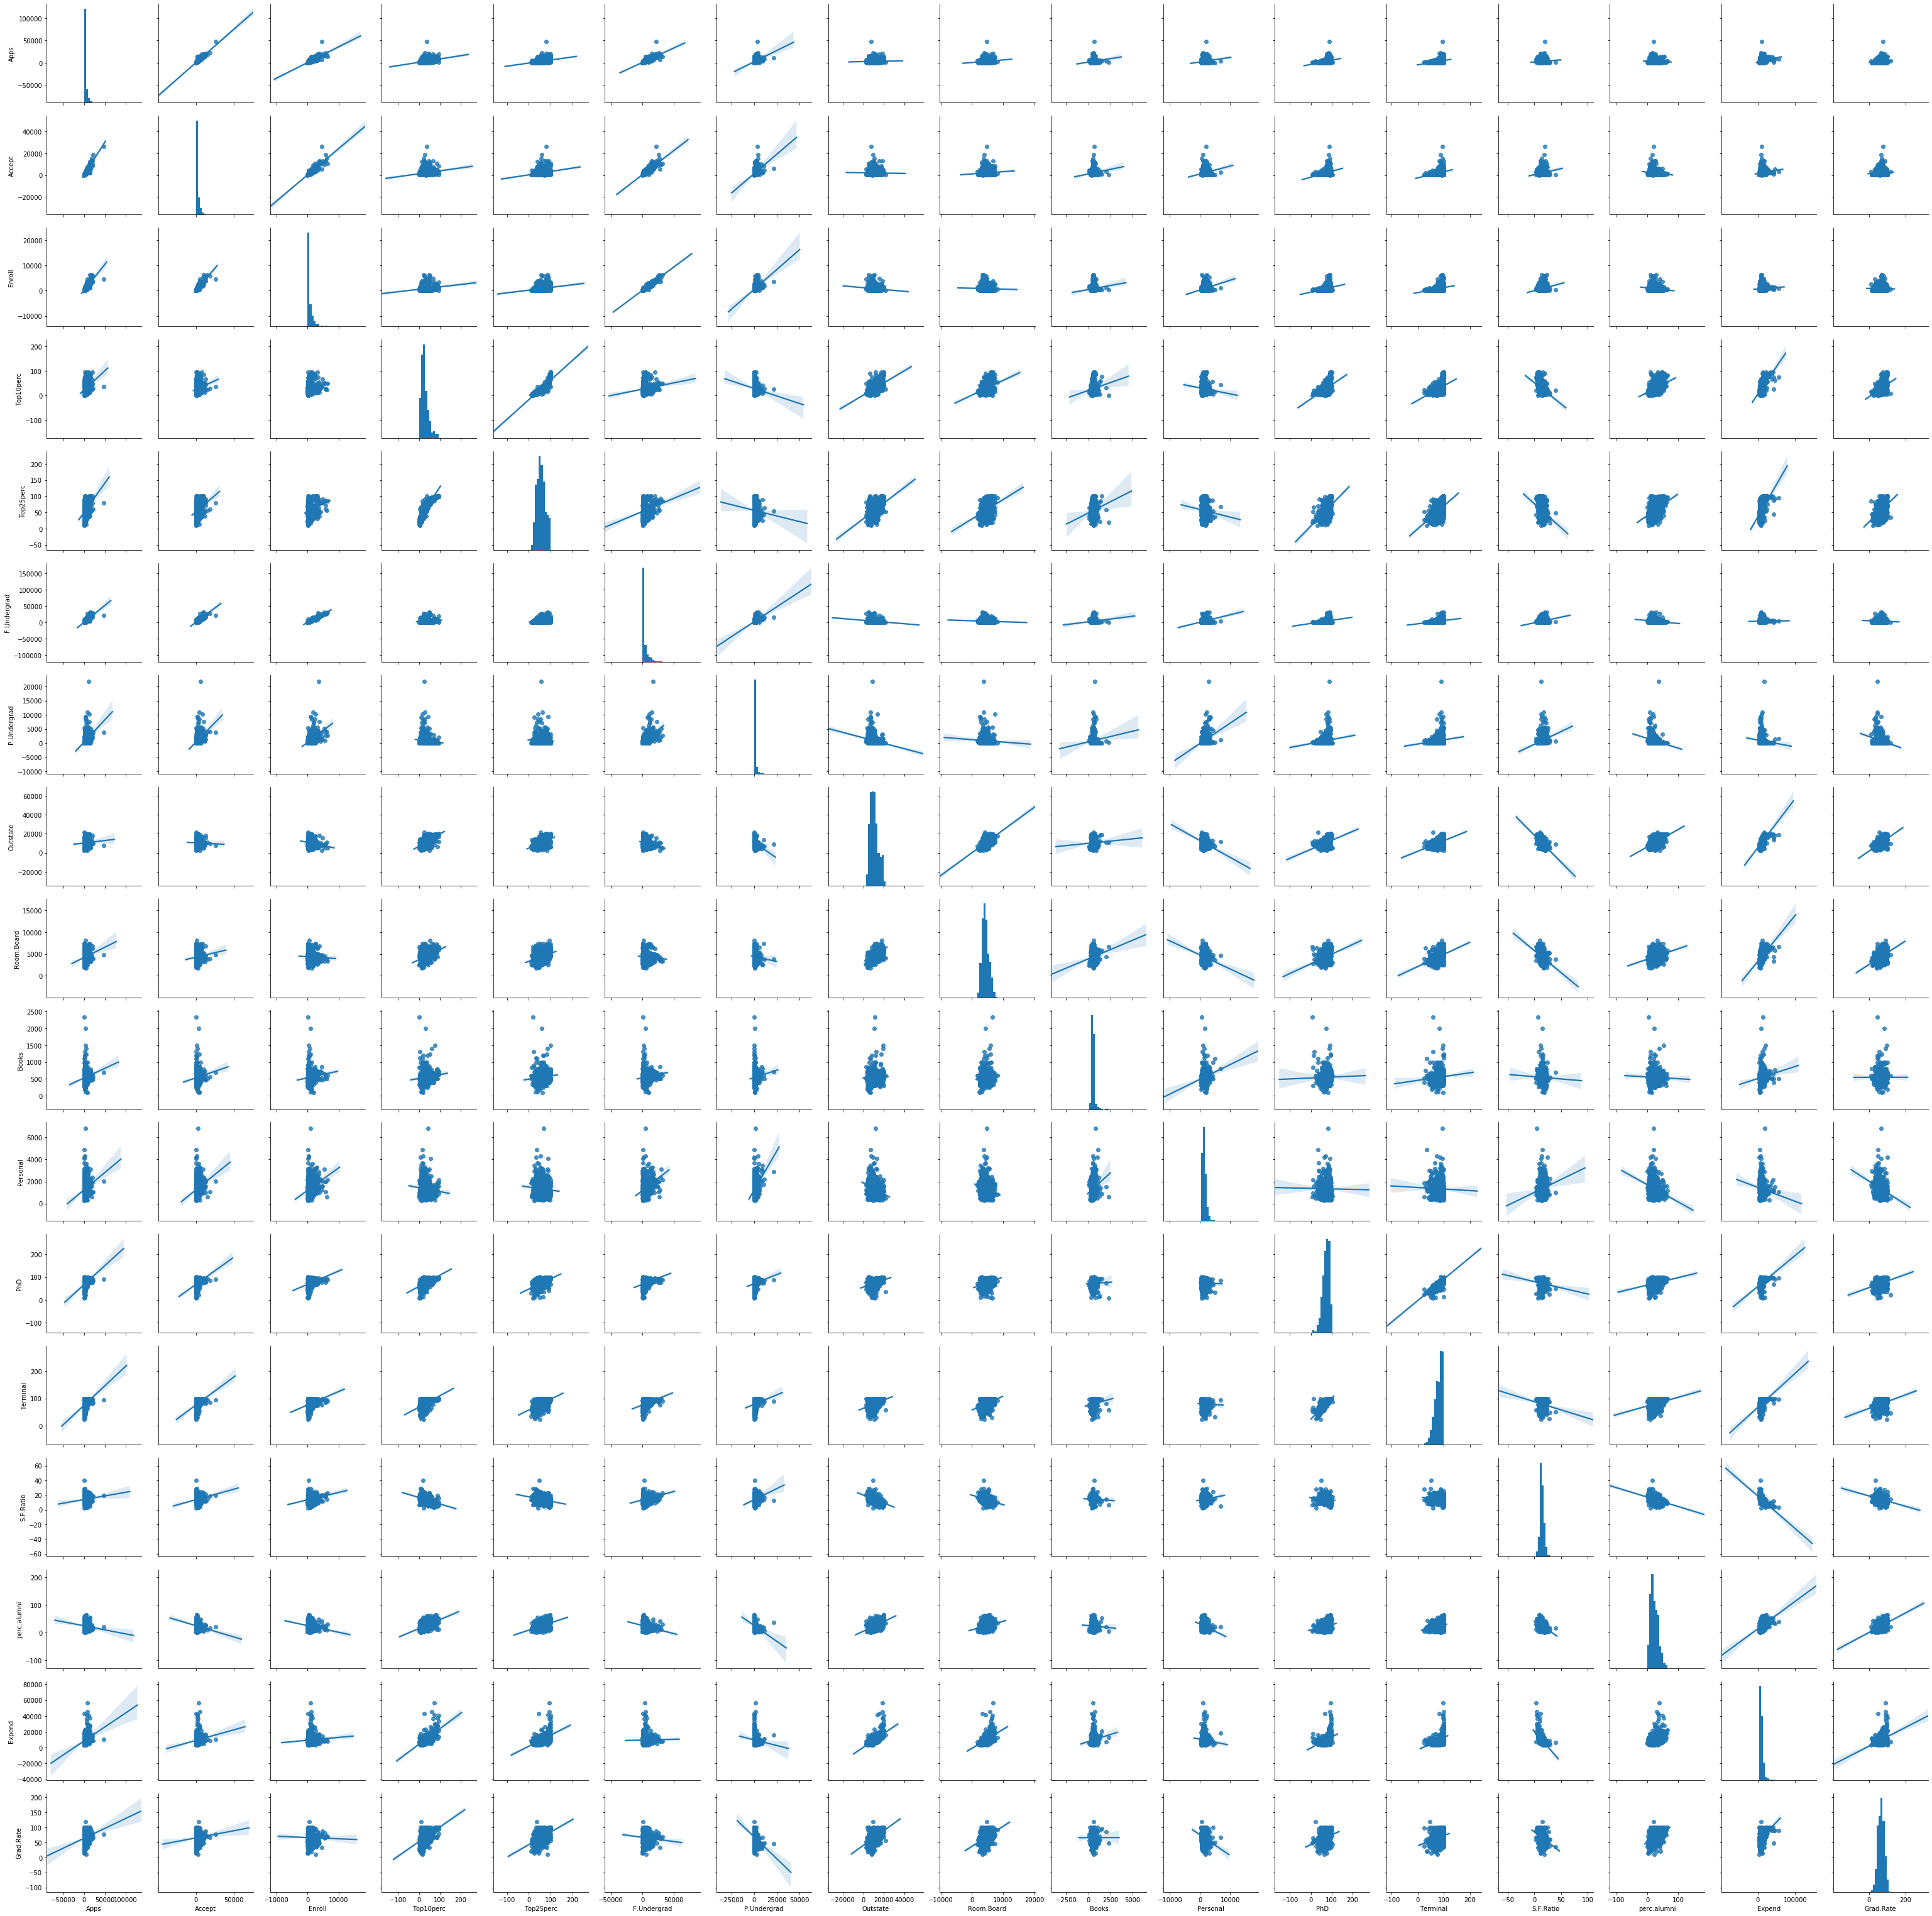

In [27]:

sns.pairplot(df, kind="reg")

In [28]:
df.corr(method='pearson')

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


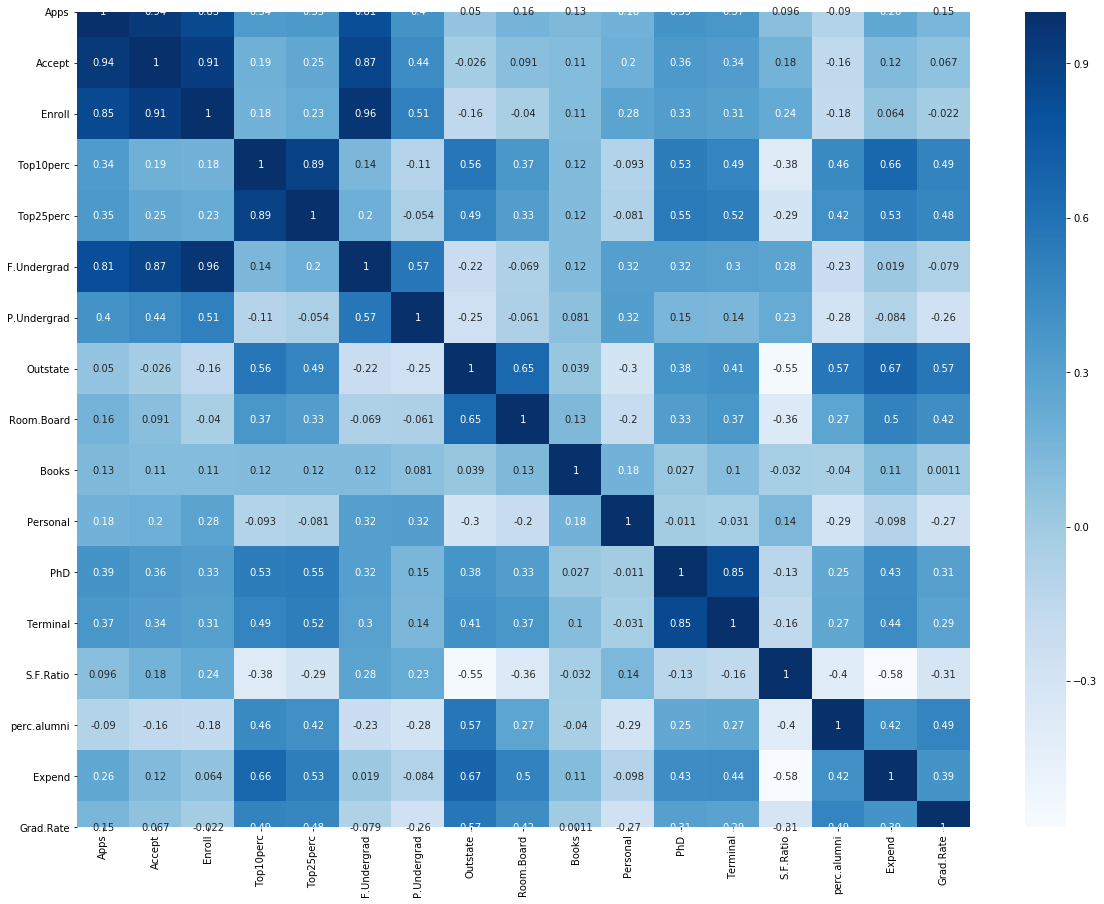

In [30]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), cmap="Blues", annot=True)  # plot the correlation coefficients as a heatmap

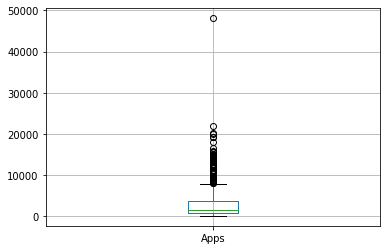

In [35]:
df.boxplot(column=['Apps'])

In [37]:
std_scale = StandardScaler()

std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:
df['Apps_Stdscale'] = std_scale.fit_transform(df[['Apps']])

In [40]:
df['Apps_Stdscale'].head()

0   -0.346882
1   -0.210884
2   -0.406866
3   -0.668261
4   -0.726176
Name: Apps_Stdscale, dtype: float64

In [41]:
df['Apps_Stdscale'].min(), df['Apps_Stdscale'].max()

(-0.7551337089614527, 11.658671216805628)

In [42]:
df['Apps_Stdscale'].describe()

count    7.770000e+02
mean     6.355797e-17
std      1.000644e+00
min     -7.551337e-01
25%     -5.754408e-01
50%     -3.732540e-01
75%      1.609122e-01
max      1.165867e+01
Name: Apps_Stdscale, dtype: float64

In [45]:
ndf=df.drop(["Names"],axis=1)
ndf.head(10)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Apps_Stdscale
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,-0.346882
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,-0.210884
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,-0.406866
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,-0.668261
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,-0.726176
5,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55,-0.624307
6,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63,-0.684808
7,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73,-0.285088
8,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80,-0.507700
9,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52,-0.625600


In [46]:
from scipy.stats import zscore
ndf=ndf.apply(zscore)
ndf.head()
#Scaling of variables

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Apps_Stdscale
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252,-0.346882
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262,-0.210884
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767,-0.406866
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504,-0.668261
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613,-0.726176


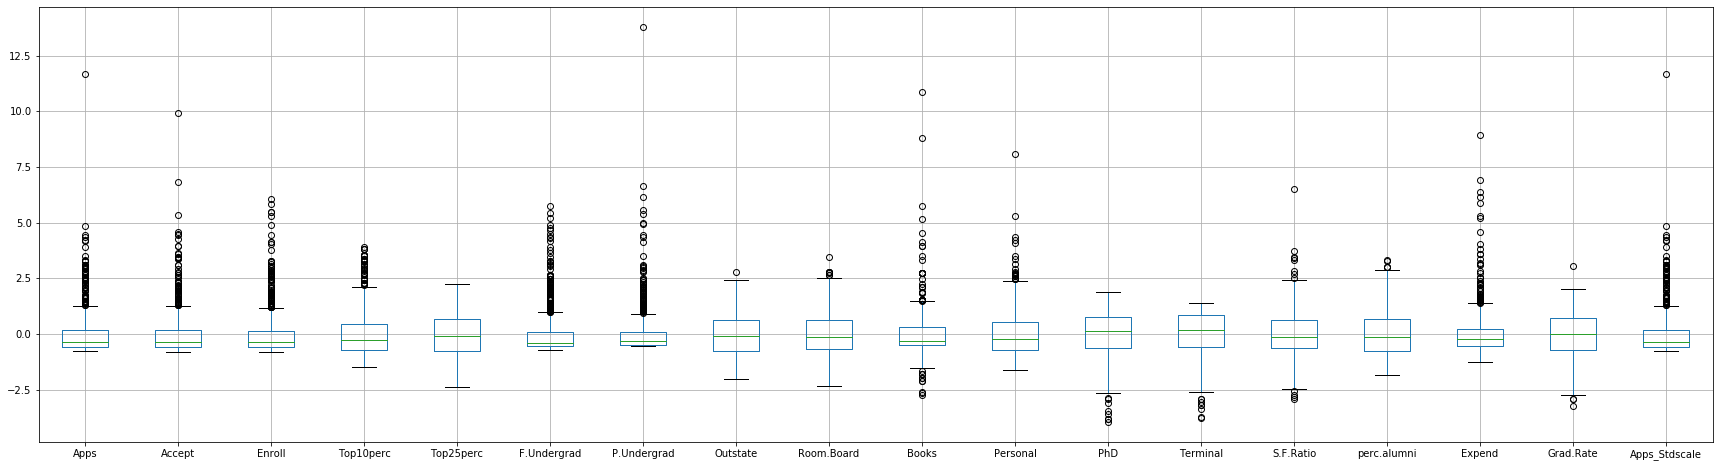

In [48]:
ndf.boxplot(figsize=(30,8))

In [49]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(ndf)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 0.31264518 -0.14702636 -0.0278662  ... -0.02492727 -0.43426751
   0.12981556]
 [-0.14702636  1.4766855   0.15648419 ...  0.01293155  0.04157733
  -0.22622655]
 [-0.0278662   0.15648419  0.16145169 ... -0.01932276  0.17310507
  -0.04234064]
 ...
 [-0.02492727  0.01293155 -0.01932276 ...  0.1499423  -0.04161642
  -0.01934861]
 [-0.43426751  0.04157733  0.17310507 ... -0.04161642  2.90556211
  -0.48983232]
 [ 0.12981556 -0.22622655 -0.04234064 ... -0.01934861 -0.48983232
   0.53443344]]


In [50]:
# The transpose of covarience matrix also gives the same result
cov_matrix = np.cov(ndf.T)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372  1.00128866]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929  0.94466636]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983  0.84791332]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711  0.33927032]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  

In [ ]:
#Comparing Correlation and Covarince Matrix

In [52]:
# Checking corelation matric without scaling
df_corr = df.copy()
df_corr.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Apps_Stdscale
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755,1.000000
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313,0.943451
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341,0.846822
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989,0.338834
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281,0.351640
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773,0.814491
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001,0.398264
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290,0.050159
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942,0.164939
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061,0.132559


In [53]:
ndf.corr()
#Generating same result with and without standarization

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Apps_Stdscale
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755,1.000000
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313,0.943451
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341,0.846822
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989,0.338834
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281,0.351640
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773,0.814491
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001,0.398264
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290,0.050159
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942,0.164939
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061,0.132559


In [54]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [5.97897619e+00 4.81462179e+00 1.18158828e+00 1.07672561e+00
 9.34245344e-01 8.48633320e-01 6.07065490e-01 5.92910370e-01
 5.33937578e-01 4.05311044e-01 3.14087988e-01 4.71121604e-17
 2.42877709e-02 4.14419074e-02 8.88596626e-02 2.14770697e-01
 2.21502363e-01 1.44230469e-01]
Eigen Vectors 
 %s [[ 3.41477090e-01  1.97153787e-01  9.17895594e-02  2.29189981e-01
   2.63201484e-03  1.03150701e-02 -4.89141723e-02  8.13613282e-02
   6.89379614e-02  4.73849793e-02 -4.74812424e-02 -7.07106781e-01
  -1.46326248e-01  2.58353946e-01  7.05599538e-02  3.83201087e-01
  -1.57308181e-01  2.16055120e-02]
 [ 3.15607972e-01  2.47773476e-01  1.21597297e-01  1.94281107e-01
   5.25603247e-02 -1.42410481e-02 -9.13637780e-03  3.52877088e-02
   1.49938030e-01  2.47147747e-02  6.91470289e-02  4.95285390e-15
   4.86052581e-01 -6.66040423e-01 -2.08018298e-01  1.35450990e-01
   1.13208106e-01 -3.10004970e-03]
 [ 2.92591884e-01  2.84271892e-01  8.02887534e-02  7.57981926e-02
  -5.80992114e-02  3.

In [ ]:
# A total of 4 eigen values are greater than 1

In [56]:
total = sum(eig_vals)
var_exp = [( i /total ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 33.17378466  59.88725893  66.44318989  72.41730025  77.6008723
  82.30943412  85.67767965  88.96738684  91.92988906  94.1787191
  95.92140664  97.15039158  98.34202651  99.14227564  99.63530509
  99.8652416  100.         100.        ]


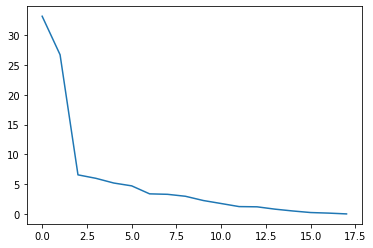

In [57]:
plt.plot(var_exp)

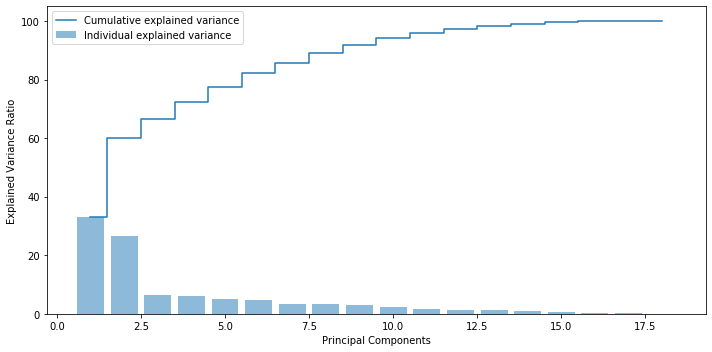

In [58]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()

In [61]:
# Here, we are generating only 4 PCA dimensions (dimensionality reducing from 18 to 4)

pca = PCA(n_components=4)
data_reduced = pca.fit_transform(ndf)
data_reduced.transpose()

array([[-1.26876682, -2.13574499, -1.74661273, ..., -0.74509346,
         6.93000263, -0.28987184],
       [ 1.26918203,  0.40799051, -0.43349935, ...,  0.19554987,
        -4.75808441,  0.52013593],
       [ 0.05122354,  1.6396389 , -0.58590288, ..., -0.01470956,
         1.85482822, -1.26792321],
       [-0.92133933,  3.94792922,  0.69733506, ...,  0.06460427,
         1.32421288, -0.40406256]])

In [62]:
pca.components_

array([[ 0.34147709,  0.31560797,  0.29259188,  0.28113093,  0.28304425,
         0.2767323 ,  0.12312256,  0.17509048,  0.173694  ,  0.0731169 ,
         0.03102688,  0.28988007,  0.28461223, -0.0733879 ,  0.09588568,
         0.23620355,  0.16774458,  0.34147709],
       [ 0.19715379,  0.24777348,  0.28427189, -0.22288242, -0.18661555,
         0.30451638,  0.26265471, -0.3437291 , -0.224981  ,  0.02057516,
         0.2077816 , -0.08883442, -0.09892881,  0.29125185, -0.30462286,
        -0.24957074, -0.25276371,  0.19715379],
       [-0.09178944, -0.12159763, -0.0802887 ,  0.04974118,  0.00370618,
        -0.04915961,  0.18228983,  0.02517257,  0.12066751,  0.66032149,
         0.53200419, -0.03493928,  0.02248605, -0.25333866, -0.14727837,
         0.21137611, -0.23928667, -0.09178944],
       [ 0.22919027,  0.19428034,  0.07579836, -0.06248769, -0.13762463,
         0.01924639, -0.18076952,  0.13510957,  0.19734798,  0.17797686,
        -0.14607274, -0.55150416, -0.52602312, -0.223

In [63]:
pca.explained_variance_ratio_

array([0.33173785, 0.26713474, 0.06555931, 0.0597411 ])

In [64]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var
#cumulative sum of variance explained with [n] features

array([33.2, 59.9, 66.5, 72.5])

In [67]:
df_comp = pd.DataFrame(pca.components_,columns=list(ndf))
df_comp.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Apps_Stdscale
0,0.341477,0.315608,0.292592,0.281131,0.283044,0.276732,0.123123,0.175090,0.173694,0.073117,0.031027,0.289880,0.284612,-0.073388,0.095886,0.236204,0.167745,0.341477
1,0.197154,0.247773,0.284272,-0.222882,-0.186616,0.304516,0.262655,-0.343729,-0.224981,0.020575,0.207782,-0.088834,-0.098929,0.291252,-0.304623,-0.249571,-0.252764,0.197154
2,-0.091789,-0.121598,-0.080289,0.049741,0.003706,-0.049160,0.182290,0.025173,0.120668,0.660321,0.532004,-0.034939,0.022486,-0.253339,-0.147278,0.211376,-0.239287,-0.091789
3,0.229190,0.194280,0.075798,-0.062488,-0.137625,0.019246,-0.180770,0.135110,0.197348,0.177977,-0.146073,-0.551504,-0.526023,-0.223857,-0.012089,0.116407,0.201694,0.229190


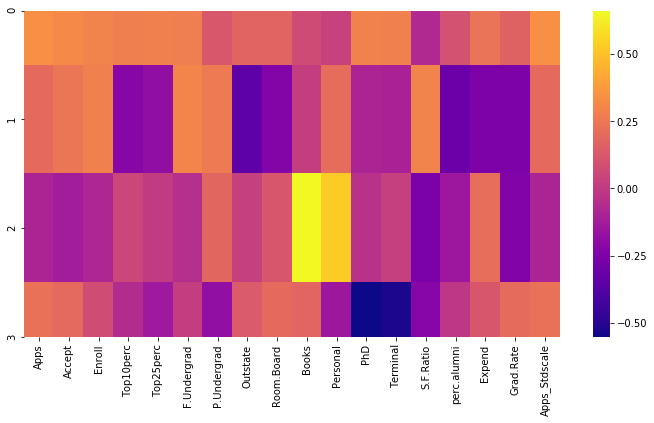

In [70]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

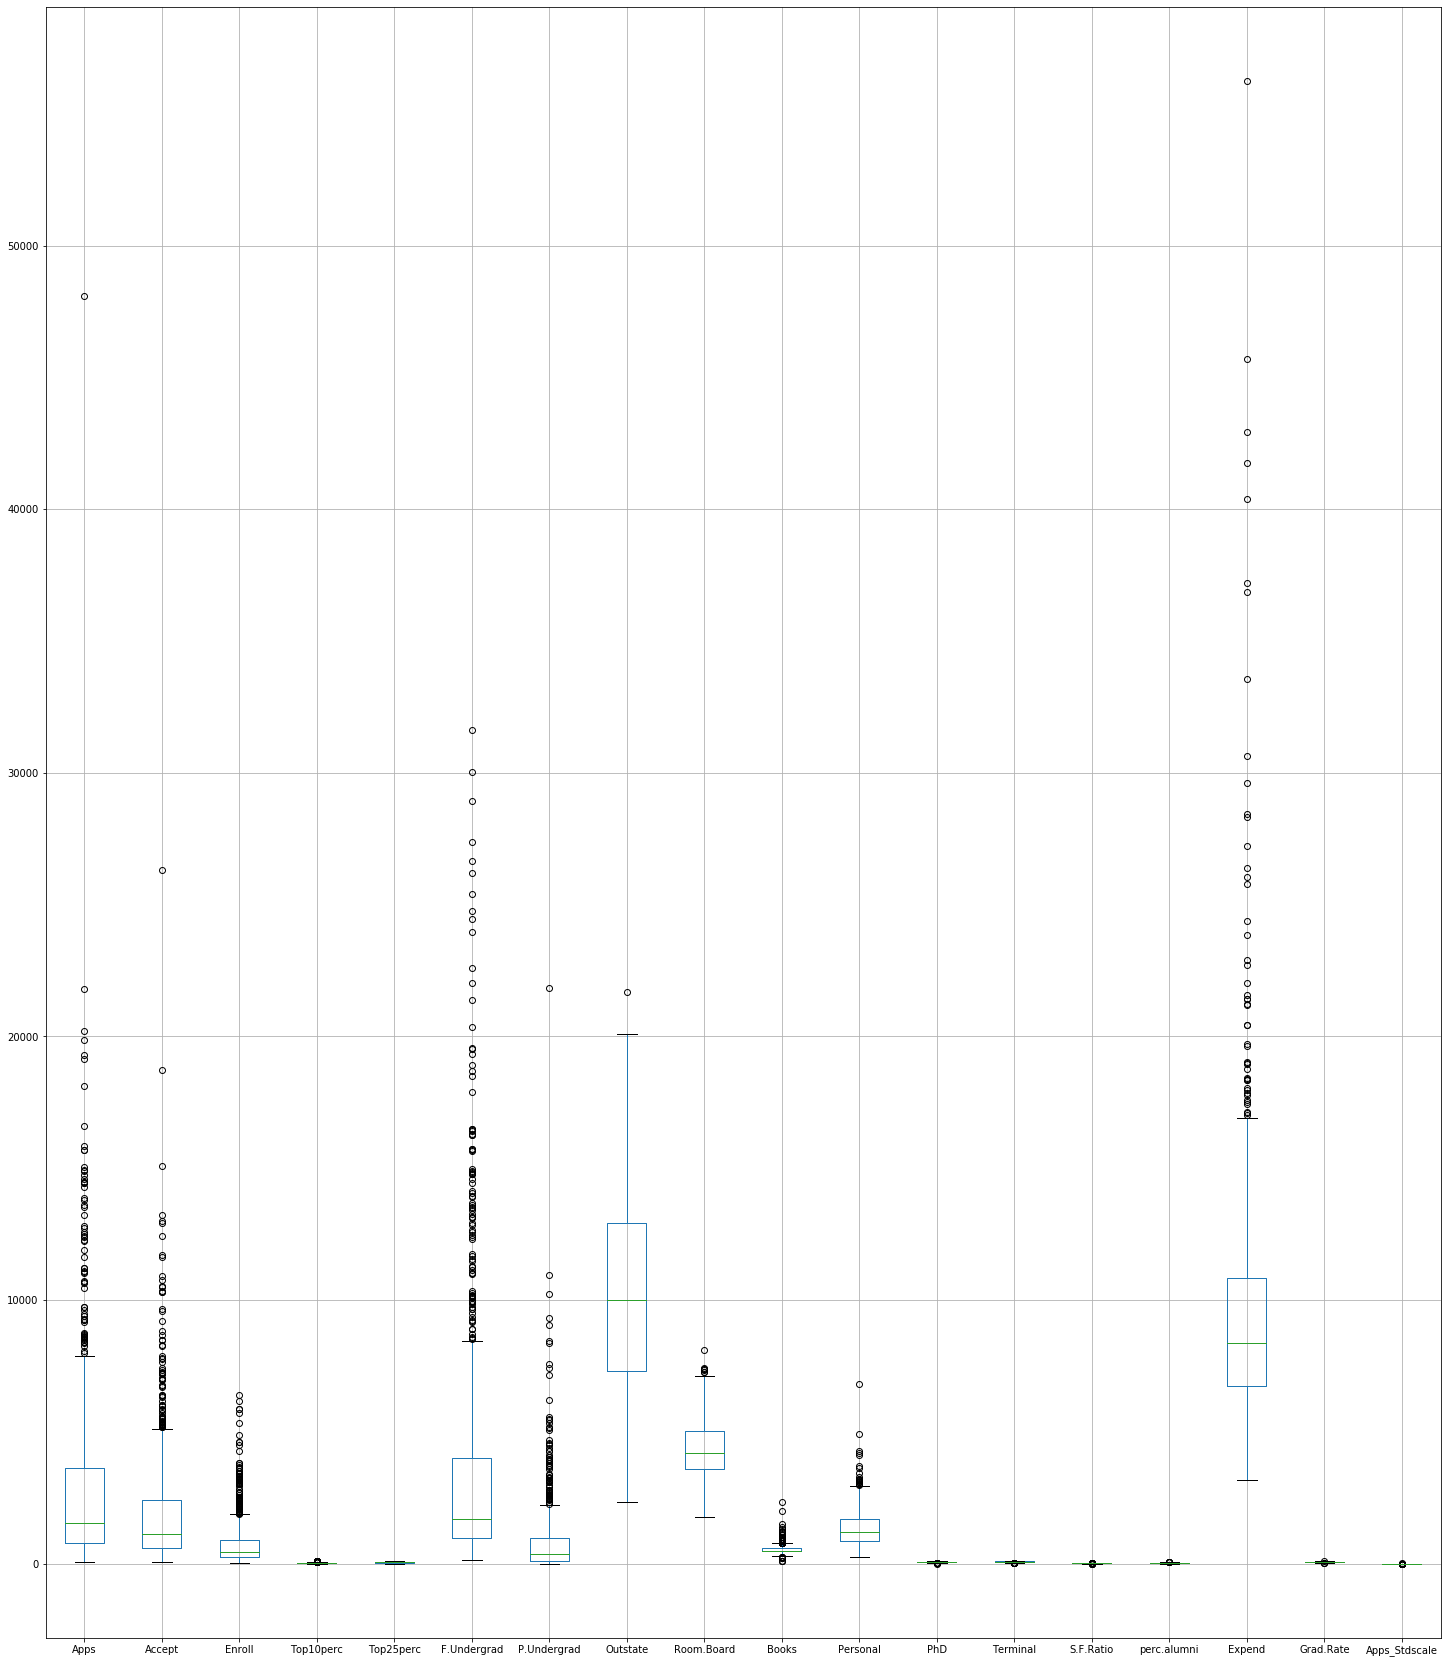

In [72]:
plt.subplots(figsize=(25,30))
df.boxplot(figsize=(25,20))

In [74]:
ndf.apply(zscore)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Apps_Stdscale
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252,-0.346882
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262,-0.210884
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767,-0.406866
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504,-0.668261
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613,-0.726176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,-0.208040,-0.205673,-0.255200,-1.336352,-1.505488,-0.126030,0.771435,-0.906289,-0.417455,-0.299280,-0.207855,-0.775861,-1.339146,1.746877,-0.706073,-0.994781,-1.483301,-0.208040
773,-0.269575,-0.087284,-0.091509,-0.201858,-0.444454,-0.175543,0.165435,0.268462,0.549707,0.306784,-0.133960,0.020822,-0.319632,-0.199632,0.666685,-0.090290,1.021555,-0.269575
774,-0.233895,-0.042377,-0.091509,0.365389,0.262901,-0.187095,-0.453053,-0.880670,-0.143730,0.409815,-0.827095,-0.346878,-0.319632,0.078441,-0.221570,-0.256241,-0.959029,-0.233895
775,1.991711,0.177256,0.578333,3.825595,2.182866,0.312977,-0.507606,2.337894,1.963953,0.488603,1.144424,1.430339,1.107689,-2.095582,2.120194,5.887971,1.953595,1.991711


In [76]:
df['Apps'] = np.where(df['Apps'] >4, 4, df['Apps'])
df['Apps'].value_counts() 

4    777
Name: Apps, dtype: int64

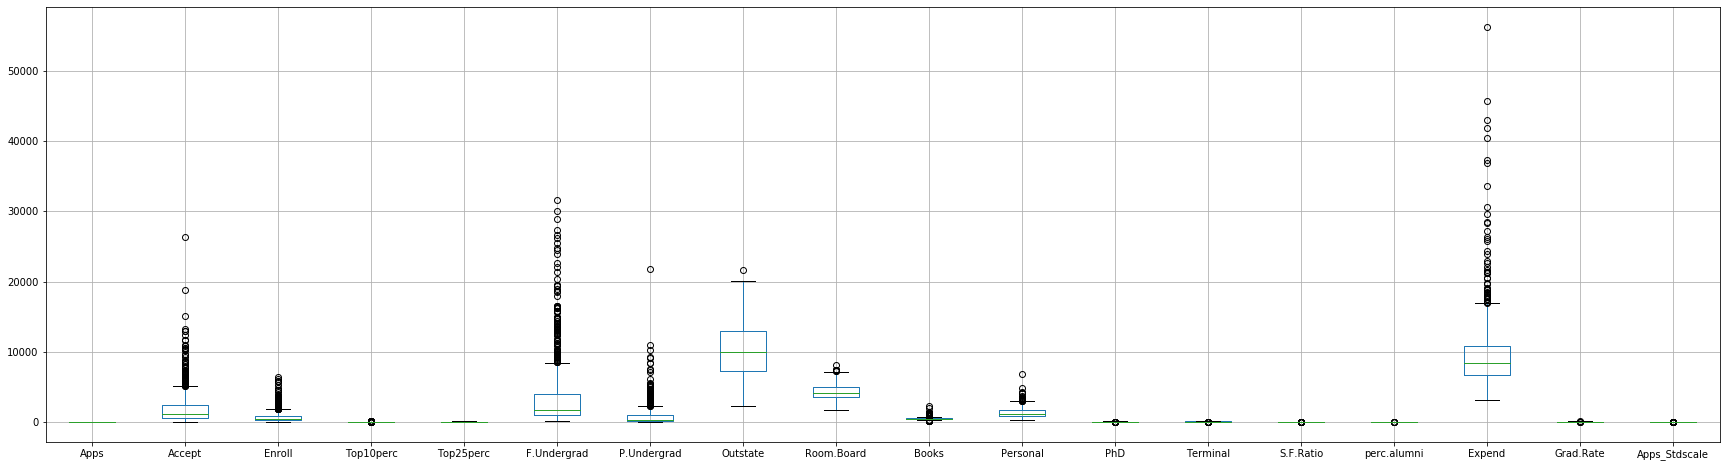

In [78]:
df.boxplot(figsize=(30,8))

In [79]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Apps                0.000000
Accept           1820.000000
Enroll            660.000000
Top10perc          20.000000
Top25perc          28.000000
F.Undergrad      3013.000000
P.Undergrad       872.000000
Outstate         5605.000000
Room.Board       1453.000000
Books             130.000000
Personal          850.000000
PhD                23.000000
Terminal           21.000000
S.F.Ratio           5.000000
perc.alumni        18.000000
Expend           4079.000000
Grad.Rate          25.000000
Apps_Stdscale       0.736353
dtype: float64


In [85]:
zdf=ndf.apply(zscore)
zdf.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Apps_Stdscale
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252,-0.346882
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262,-0.210884
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767,-0.406866
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504,-0.668261
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613,-0.726176


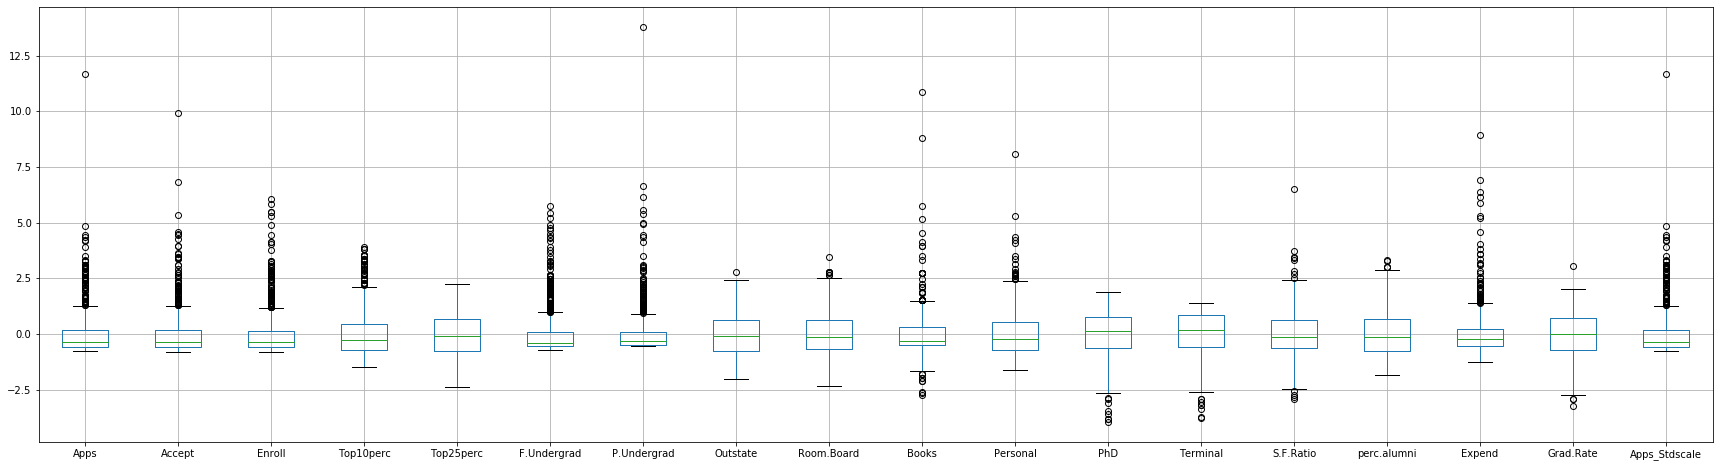

In [86]:
zdf.boxplot(figsize=(30,8))

In [89]:
z = np.abs(stats.zscore(zdf))   
print(z)

[[3.46881819e-01 3.21205453e-01 6.35089011e-02 ... 5.01910084e-01
  3.18251941e-01 3.46881819e-01]
 [2.10884040e-01 3.87029908e-02 2.88584214e-01 ... 1.66109850e-01
  5.51261842e-01 2.10884040e-01]
 [4.06865631e-01 3.76317928e-01 4.78121319e-01 ... 1.77289956e-01
  6.67766793e-01 4.06865631e-01]
 ...
 [2.33895071e-01 4.23771558e-02 9.15087008e-02 ... 2.56241250e-01
  9.59029170e-01 2.33895071e-01]
 [1.99171118e+00 1.77256262e-01 5.78332661e-01 ... 5.88797079e+00
  1.95359460e+00 1.99171118e+00]
 [3.26765760e-03 6.68715889e-02 9.58163623e-02 ... 9.87115613e-01
  1.95359460e+00 3.26765760e-03]]


In [90]:
threshold = 3
np.where(z > threshold)

(array([  1,  16,  16,  20,  23,  23,  23,  23,  37,  59,  59,  59,  59,
         60,  63,  69,  69,  70,  85,  86,  95,  95, 100, 100, 106, 144,
        158, 158, 174, 174, 191, 201, 203, 222, 223, 223, 226, 226, 242,
        250, 250, 251, 264, 274, 274, 274, 274, 274, 275, 277, 284, 311,
        317, 354, 354, 363, 366, 366, 366, 366, 366, 368, 368, 368, 412,
        418, 424, 424, 430, 445, 445, 445, 445, 446, 459, 459, 461, 461,
        461, 461, 461, 471, 483, 483, 483, 483, 483, 494, 497, 506, 510,
        513, 513, 562, 562, 562, 573, 581, 581, 581, 585, 605, 605, 605,
        605, 606, 606, 606, 606, 607, 609, 614, 619, 619, 620, 623, 623,
        623, 623, 623, 626, 628, 633, 633, 634, 634, 637, 637, 637, 637,
        637, 640, 644, 663, 663, 669, 676, 684, 685, 685, 685, 685, 685,
        686, 687, 687, 690, 691, 693, 693, 694, 700, 700, 700, 700, 700,
        701, 711, 713, 713, 713, 713, 713, 720, 728, 735, 737, 739, 762,
        763, 763, 775, 775]),
 array([12,  3, 14, 1

In [94]:
np.where((zdf < (Q1 - 1.5 * IQR)) | (zdf> (Q3 + 1.5 * IQR)))

(array([  0,   0,   0, ..., 776, 776, 776]),
 array([ 0,  8,  9, ..., 13, 15, 16]))

In [95]:
zdf1 = zdf[(z < 3).all(axis=1)]    
zdf1.shape, zdf.shape

((682, 18), (777, 18))

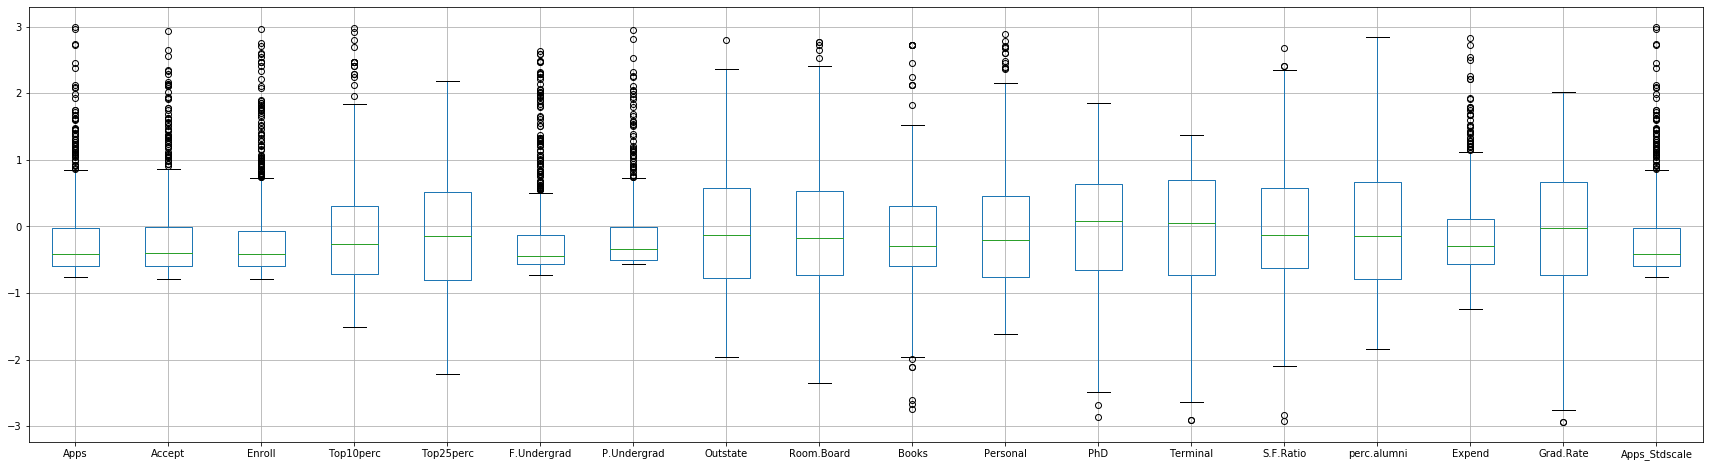

In [96]:
zdf1.boxplot(figsize=(30,8))

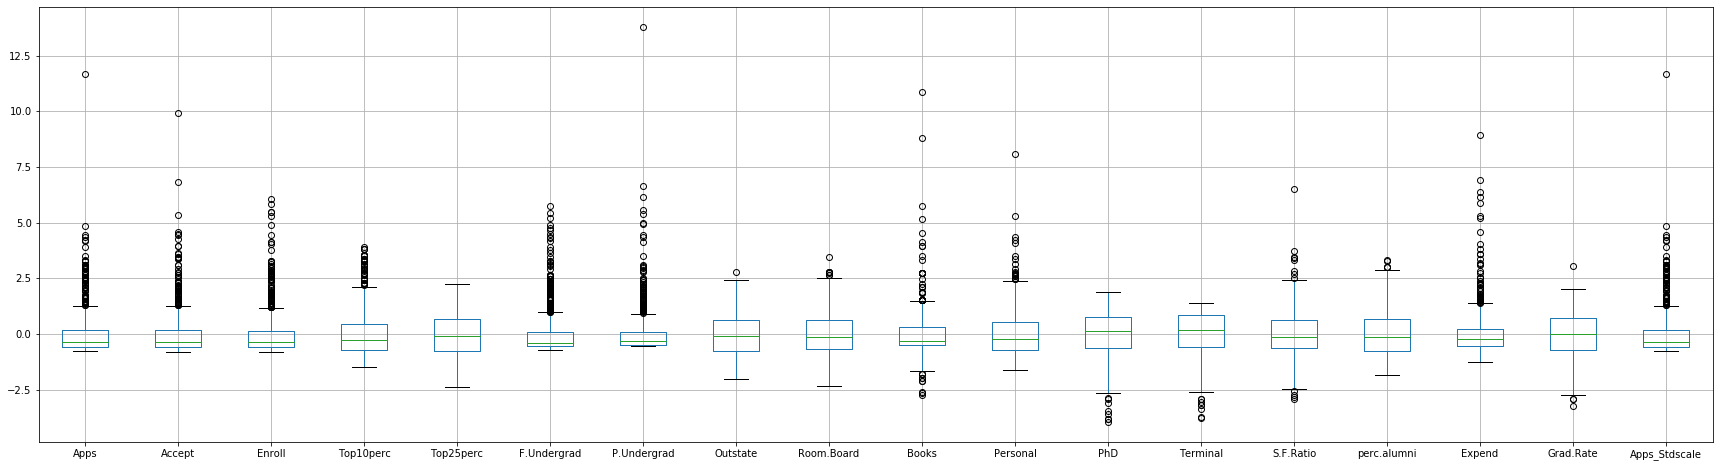

In [97]:
zdf.boxplot(figsize=(30,8))

In [99]:
zdf2 = zdf.copy()   #make a deep copy of the dataframe

#Replace all the outliers with median values. This will create new some outliers but, we will ignore them

for i, j in zip(np.where(z > threshold)[0], np.where(z > threshold)[1]):# iterate using 2 variables.i for rows and j for columns
    zdf2.iloc[i,j] = zdf.iloc[:,j].median()  # replace i,jth element with the median of j i.e, corresponding column

In [100]:
z = np.abs(stats.zscore(zdf2))
np.where(z > threshold)

(array([ 16,  21,  23,  23,  27,  27,  34,  59,  60,  60,  61,  61,  70,
         70,  70,  86,  87,  91, 102, 141, 142, 144, 152, 159, 174, 174,
        181, 191, 203, 203, 203, 203, 218, 226, 250, 250, 251, 257, 269,
        273, 277, 277, 284, 288, 288, 298, 301, 303, 317, 324, 324, 324,
        341, 365, 365, 366, 373, 394, 407, 407, 407, 407, 412, 412, 412,
        418, 418, 418, 420, 420, 424, 424, 427, 432, 432, 432, 436, 440,
        445, 459, 459, 461, 464, 473, 480, 482, 483, 510, 510, 528, 536,
        560, 560, 560, 561, 561, 562, 562, 563, 563, 563, 576, 578, 580,
        581, 581, 603, 605, 605, 608, 608, 611, 614, 614, 614, 614, 614,
        619, 619, 619, 620, 620, 624, 626, 633, 633, 633, 633, 634, 634,
        634, 640, 640, 642, 642, 644, 647, 647, 649, 651, 651, 651, 651,
        651, 656, 657, 657, 660, 661, 663, 663, 664, 667, 675, 676, 677,
        677, 677, 683, 683, 683, 685, 685, 686, 691, 691, 693, 694, 694,
        694, 694, 694, 708, 711, 720, 727, 733, 733

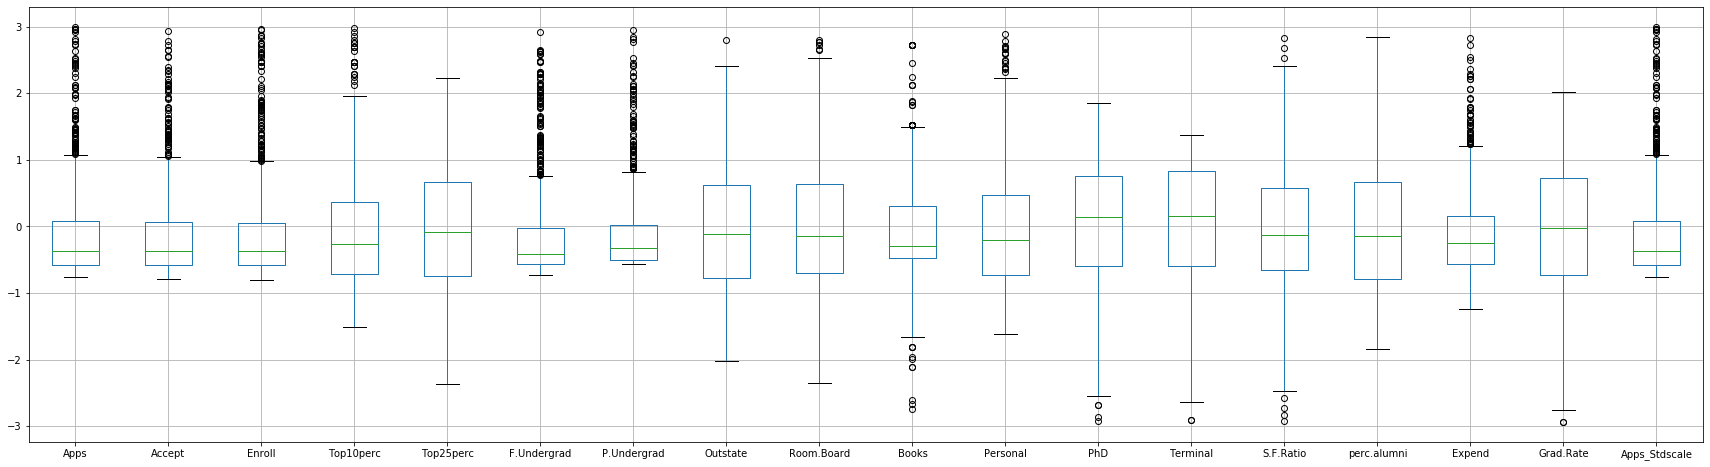

In [101]:
zdf2.boxplot(figsize=(30,8))

In [102]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  

In [105]:
lrincome,urincome=remove_outlier(zdf['Apps'])
zdf['Apps']=np.where(zdf['Apps']>urincome,urincome,zdf['Apps'])
zdf['Apps']=np.where(zdf['Apps']<lrincome,lrincome,zdf['Apps'])


lrincome,urincome=remove_outlier(zdf['Accept'])
zdf['Accept']=np.where(zdf['Accept']>urincome,urincome,zdf['Accept'])
zdf['Accept']=np.where(zdf['Accept']<lrincome,lrincome,zdf['Accept'])
lrincome,urincome=remove_outlier(zdf['Enroll'])
zdf['Enroll']=np.where(zdf['Enroll']>urincome,urincome,zdf['Enroll'])
zdf['Enroll']=np.where(zdf['Enroll']<lrincome,lrincome,zdf['Enroll'])
zdf.shape


(777, 18)

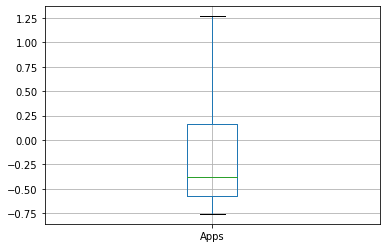

In [106]:
zdf.boxplot(column=['Apps'])